## **CHAPTER 3 평가**

**머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가(Evaluation)의 프로세스로 구성된다.**

**머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있는데, 성능 평가 지표(Evaluation Metric)는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉜다.**

**회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반한다.**

> **예를 들어 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다.**

**분류의 평가방법도 일반적으로 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있다.**

> **정확도(Accuracy)**

> **오차행렬(Confusion Matrix)**

> **정밀도(Precision)**

> **F1 스코어**

> **ROC AUC**

**분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진 분류와 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있다.**

**위에서 언급한 분류의 성능 지표는 이진/멀티 분류 모두에 적용되는 지표이지만, 특히 이진 분류에서 더욱 중요하게 강조하는 지표이다.**

## **01 정확도(Accuracy)**

**정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이다.**

![test](./img/acc.jpeg)

![test](./img/accuracy.png)

**정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.**

> **앞의 타이타닉 예제를 생각해보면 ML 알고리즘을 적용한 후 예측 정확도의 결과가 보통 80%대였지만, 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있다. 즉, 단지 성별 조건 하나만을 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황이 발생한다.**

In [1]:
# 다음 예제는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 
# 생존자를 예측하는 단순한 Classifier를 생성한다.
# 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimaor를 개발자가 생성할 수 있다.
# 생성할 MyDummyClassifier 클래스는 학습을 수행하는 fit() 메서드는 아무것도 수행하지 않으며
# 예측을 수행하는 predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는
# 매우 단순한 Classifier이다.
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

In [2]:
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self,X,y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [3]:
# 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 한다.

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_feature(df)
    return df

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)
X_titanic_df = transform_features(X_titanic_df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=0)

In [7]:
# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

In [8]:
# 이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로
# 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 한다.
my_predictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도: {:.4f}'.format(accuracy_score(y_test,my_predictions)))

Dummy Classifier의 정확도: 0.7877


**특히 정확도는 불균형한(imbalanced) 레이블 값 분포에 ML모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.**

> **예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다.**

![test](./img/상속.png)

In [9]:
# MNIST 데이터 셋 예제 (자세한 데이터 설명은 p146)
from sklearn.datasets import load_digits # Mnist 데이터 셋
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [10]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 변환
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True, 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [11]:
# 다음으로 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고,
# 불균형한 레이블 분포도 확인
print('레이블 테스트 세트 크기:',y_test.shape)
# 숫자 7의 갯수: 45, 7이 아닌 숫자 갯수: 405
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64


In [12]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test,fakepred)))

모든 예측을 0으로 하여도 정확도는: 0.900


**단순히 predict()의 결과를 np.zeros()로 모두 0 값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%이다. 단지 모든 것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90%로 유수의 ML알고리즘과 어깨를 겨룰 수 있다는 것은 말도 안 되는 결과이다.**

**이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 된다. 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야 한다.**

## **02 오차 행렬**

**이진 분류에서 성능 지표로 잘 활용되는 오차행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다.**

**이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.**

![test](./img/acc.jpeg)

**오차 행렬은 다음과 같은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다.**

> **예를 들어 TN은 True Negative의 의미이며 앞 True는 예측 클래스 값과 실제 클래스 값이 같다는 의미고 뒤의 Negative는 예측값이 Negative라는 의미이다.**

> **TN는 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0**

> **FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0**

> **FN은 예측값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1**

> **TP는 예측값을 Positive값 1로 예측했는데 실제 값 역시 Positive 값 1**

**사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공한다.**

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
# 출력된 오차 행렬은 ndarray 형태이다.
# 이진 분류의 TN, 
confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

**출력된 오차 행렬은 ndarray 형태이다.**

**TP,TN,FP,TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공한다. 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precisison), 재현율(Recall)값을 알 수 있다.**

**일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 겨우는 Negative로 0 값을 부여하는 경우가 많다.**

**불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다.**

> **예를 들어 10,000개의 데이터셋에서 9,900건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 된다.**

> **또한, Negative로 예측할 때 정확도가 높기 때문에 FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP역시 매우 작아진다.**

**결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으킨다.**

**정확도는 분류(Classifier)모델의 성능을 측정할 수 있는 한 가지 요소일 뿐이다.**

## **03 정밀도와 재현율**

**정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.**

> **정밀도 = TP / (FP + TP)**

> **재현율 = TP / (FN + TP)**

**정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.**

> **공식의 분모인 FP+TP는 예측을 Positive로 한 모든 데이터 건수이며, 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다.**

**재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.**

> **공식의 분모인 FN+TP는 실제 값이 Positive인 모든 데이터 건수이며 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다.**

**재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다.**

> **예를 들어 암 판단 모델은 재현율이 훨씬 중요한 지표이다. 왜냐하면 실제 Positive인 암 환자를 Positive 양성이 아닌 Negative 음섬으로 잘못 판단 했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각하기 때문이다.**

> **또한 보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요하다. 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것이다.**

**보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만, 정밀도가 더 중요한 지표인 경우도 있다.**

> **예를 들어 스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생긴다.**

**재현율이 상대적으로 더 중요한 지표인 경우 실제 Positive 양성인 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**

**정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**

**재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive,예측 Negative)는 낮추는데, 정밀도는 FP(실제 Negative, 예측 Positive)을 낮추는데 초점을 맞춘다.**

> **가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다. 반면에 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않다.**

In [15]:
# 오차 행렬 및 정밀도, 재현율을 모두 구해서 예측 성능을 평가
# 사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score() API를 제공
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [16]:
# Confusion_matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 get_clf_eval()
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{:.4f}, 정밀도:{:.4f}, 재현율:{:.4f}'.format(accuracy,precision,recall))

In [17]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 평가 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [18]:
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state=11)

In [19]:
lr_clf = LogisticRegression()

In [20]:
# 정밀도에 비해 재현율이 낮게 나왔다. 재현율 또는 정밀도를 좀 더 강화하는 방법은?
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### **정밀도/재현율 트레이드오프**

**분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.**

**하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율의 트레이드오프(Trade-off)라 한다.**

**사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게 된다.**

> **예를들어 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종 예측은 더 큰 확률을 가진, 즉 90% 확률을 가진 1로 예측한다.**

> **일반적으로 이진 분류에서는 이 임곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다.**

**사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다.**

> **predict_proba()메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.**

> **predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과이다.**

> **개별 클래스의 예측 확률을 ndarray m x n (m: 입력 값의 레코드 수, n: 클래스 값 유형) 형태로 반환**

> **각 열은 개별 클래스의 예측 확률이다. 이진 분류에서 첫 번째 칼럼은 0 Negative의 확률, 두 번째 칼럼은 1 Positive의 확률이다.**

In [21]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape: {}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 추출 \n:',pred_proba[:3])

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]


In [22]:
# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
# conatenate를 사용해 pred변수에 값들을 (n,1)로 만들어주고 열을 기준으로 병합
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


**반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 된다. 그리고 맨 마지막 줄의 predict()메서드의 결과 비교에서도 나타나듯이, 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측하고 있다.**

**사실 predict() 메서드는 predict_proba()메서드에 기반해 생성된 API이다.**

> **predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API이다.**

**사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있다.**

In [23]:
# 사이킷런의 Binarizer 클래스
# threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성한다.
# 생성된 Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된
# ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환한다.
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

In [24]:
# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [25]:
from sklearn.preprocessing import Binarizer

In [26]:
# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

# 이 의사 코드로 계산된 평가 지표는 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀와 같다.
# predict()가 predict_proba()에 기반함을 알 수 있다.
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

In [27]:
get_clf_eval(y_test,custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


In [28]:
# Binarizer의 threshold 설정값을 0.4로 설정.
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197


**임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어졌다. 이유는 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다. 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True 값이 많아지게 된다.**

**Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문이다.**

In [29]:
# 이번에는 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사한다.
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1,thresholds):
    # thresholds list 객체 내의 값을 차례로 interation 하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval(y_test,custom_predict)

In [30]:
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213


**임곗값이 0.45일 경우에 디폴트 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올랐다. 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야 한다면 임계값 0.45가 가장 적당해 보인다.**

In [31]:
# 사이킷런은 이와 유사한 precision_recall_curve() API를 제공한다.
# precision_recall_curve()를 이용해 타이타닉 예측 모데의 임곗값별 정밀도와 재현율을 구한다.
# precision_recall_curve()의 인자로 실제 값 데이터 세트와 레이블 값이 1일 떄의 예측 확률 값을 입력
# 레이블 값이 1일 떄의 예측 확률 값은 predict_proba(X_test)[:,1]로 predict_proba()의
# 반환 ndarray의 두 번째 칼럼(즉, 칼럼 인덱스 1)값에 해당하는 데이터 세트이다.
from sklearn.metrics import precision_recall_curve

In [32]:
# 훈련된 모델에 테스트 데이터를 투입한 각 ndarray에 예측 확률을 반환
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 떄의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)  

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15) # 0 ~ thresholds까지 15의 step으로
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2)) # 셋째 자리에서 반올림

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


**추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임곗값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있다.**

In [33]:
# 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [34]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출,
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
                                                                                                           
    # X축을 threshold 값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle = '--',
             label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show() 

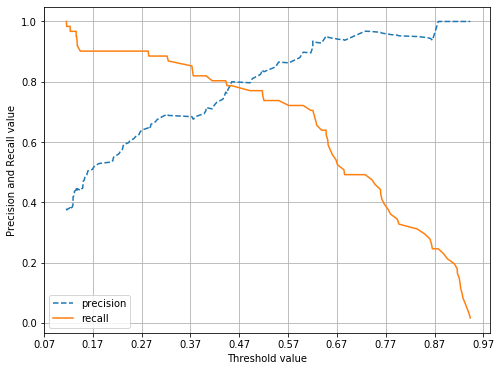

In [35]:
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

**임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아진다.**

**임곗값이 높을수록 적은 수의 양성 예측으로 인해 재현율 값이 낮아지고 정밀도가 높아진다.**

### **정밀도와 재현율의 맹점**

**앞에서도 봤듯이 Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다.**

**정밀도와 재현율 성능 수치도 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하다. 상황에 따라 분류가 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만, 그렇다고 정밀도/재현율 중 하나만 강조하는 상황이 돼서는 안 된다.**

## **04 F1 스코어**

**F1 스코어(Score)는 정밀도와 재현율을 결합한 지표이다. F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.**

![test](./img/F1.jpg)

In [36]:
# 사이킷런의 f1_score()를 통해 F1 스코어를 구한다.

from sklearn.metrics import f1_score

f1 = f1_score(y_test,pred)
print('F1 스코어:{:.4f}'.format(f1))

F1 스코어:0.7966


In [37]:
# 이번에는 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표를 구한다.

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    
    # f1 score print 추가, ROC AUC 추가
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}'
         .format(accuracy, precision,recall,f1))

In [38]:
from sklearn.metrics import roc_curve

In [39]:
# F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여준다.
# 임곗값이 0.6일 때 가장 좋은 값을 보여준다.
# 하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주시

thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000


## **05 ROC 곡선과 AUC**

![test](./img/roc1.png)

![test](./img/roc2.png)

![test](./img/roc3.png)

![test](./img/roc4.png)

![test](./img/roc5.png)

![test](./img/roc6.png)

![test](./img/roc7.png)

![test](./img/roc8.png)

**ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.**

> **ROC 곡선(Receiver Operation Characteristic Cuve)은 우리말로 수신자 판단 곡선으로 불린다. 이름이 약간 이상한 것은 원래 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치이기 떄문이다.**

**일반적으로 의학 분야에서 많이 사용되지만, 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 한다.**

**ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다. FPR을 X 축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.**

**TPR은 True Positive Rate의 약자이며, 이는 재현율을 나타낸다. 따라서 TPR은 TP/(FN+TP)이다. TPR, 즉 재현율은 민감도로 불린다. 그리고 민감도에 대응하는 지표로 TNR(True Negative Rate)이라고 불리는 특이성(Specificity)이 있다.**

> **민감도(TPR)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타낸다.(질병이 있는 사름은 질병이 있는 것으로 양성 판정)**

> **특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다.(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)**

**TNR(True Negative Rate)인 특이성은 다음과 같이 구할 수 있다. TNR = TN / (FN+TN). 그리고 ROC 곡선의 X 축 기준인 FPR(False Positive Rate)은 FP / (FP+TN)이므로 1 - TNR 또는 1 - 특이성으로 표현된다.**

![test](./img/ROC.png)

**가운데 직선은 ROC 곡선의 최저 값이다. 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류의 ROC 직선이다.(AUC는 0.5)임**

**ROC곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것이다.**

**ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한다.**



**그럼 어떻게 FPR을 0부터 1까지 변경할 수 있을까?**

> **분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이기 때문에 FPR을 0으로 만들려면 임곗값을 1로 지정하면 된다.**

> **FPR = FP / (FP+TN) 이다. 즉, 아예 Positive로 예측하지 않기 떄문에 FPR 값이 0이 되므로 자연스럽게 FPR은 0이 된다.**

**반대로 FPR을 어떻게 1로 만들 수 있을까? 바로 TN을 0으로 만들면 된다.**

> **TN을 0으로 만드려면 분류 결정 임계값을 0으로 지정하면 된다.**

> **그럼 분류기의 Positive 확률 기준이 너무 낮아서 다 Positive로 예측한다. 그럼 분류기의 Positive로 예측하지 않기 때문에 FP 값이 0이 되므로 자연스럽게 FPR은 0이 된다.**

**이렇게 임곗값을 1 부터 0까지 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값의 변화에 따른 TPR값을 구하는 것이 ROC 곡선이다.**

|  파라미터  | 설명 | 
|:---:|---:|
| `입력 파라미터` | y_true: 실제 클래스 값 array (array shape = [데이터 건수] | 
| `입력 파라미터` | y_score: predict_prob()의 반환 값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨. shape = [n_sample]|
| `반환 값` | fpr: fpr 값을 array로 반환 / tpr: tpr 값을 array로 반환 / thresholds: threshold 값 array|


In [40]:
# 사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다. 
# 사용법은 precision_recall_curve() API와 유사하다. 단지 반환값이 FPR, TPR, 임계값으로 구성
# roc_curve() API를 이용해 타이타닉 생존자 예측 모델의 FPR , TPR, 임계값을 구한다.
# 앞 정밀도와 재현율에서 학습한 LogisticRegression 객체의 predict_proba() 결과를 이용해 결과도출

from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출.
thr_index = np.arange(0,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],3))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR:',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값: [1.943 0.866 0.626 0.551 0.445 0.322 0.149 0.137 0.129 0.116]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임계값별 TPR: [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


**roc_curve()의 결과를 살펴보면 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커진다. 그리고 FPR이 조금씩 커질 때 TPR은 가파르게 커짐을 알 수 있다.**

In [41]:
# FPR의 변화에 따른 TPR의 변화를 ROC곡선으로 시각화

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label = 'Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1,),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(recall)')
    plt.legend()

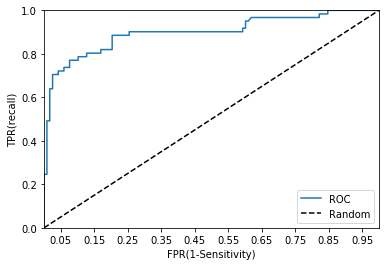

In [42]:
roc_curve_plot(y_test,pred_proba[:,1])

**일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.**

**AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치이다.**

> **AUC 수치가 커지려면 FRP이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다.**

> **가운데직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 된다.**

> **여기서 FPR은 0인 케이스에 대해 1로 잘못 예측하는 비율 EX)암환자가 아닌데 암이라고 예측하는 비율**

In [43]:
# 사이킷런은 ROC AUC를 구하기 위해 roc_auc_score() API

from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {:.4F}'.format(roc_score))

ROC AUC 값: 0.8429


In [44]:
get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
